# Capstone Project
## Image classifier for the SVHN dataset
### Instructions

In this notebook, you will create a neural network that classifies real-world images digits. You will use concepts from throughout this course in building, training, testing, validating and saving your Tensorflow classifier model.

This project is peer-assessed. Within this notebook you will find instructions in each section for how to complete the project. Pay close attention to the instructions as the peer review will be carried out according to a grading rubric that checks key parts of the project instructions. Feel free to add extra cells into the notebook as required.

### How to submit

When you have completed the Capstone project notebook, you will submit a pdf of the notebook for peer review. First ensure that the notebook has been fully executed from beginning to end, and all of the cell outputs are visible. This is important, as the grading rubric depends on the reviewer being able to view the outputs of your notebook. Save the notebook as a pdf (File -> Download as -> PDF via LaTeX). You should then submit this pdf for review.

### Let's get started!

We'll start by running some imports, and loading the dataset. For this project you are free to make further imports throughout the notebook as you wish. 

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from scipy.io import loadmat
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

![SVHN overview image](data/svhn_examples.jpg)
For the capstone project, you will use the [SVHN dataset](http://ufldl.stanford.edu/housenumbers/). This is an  image dataset of over 600,000 digit images in all, and is a harder dataset than MNIST as the numbers appear in the context of natural scene images. SVHN is obtained from house numbers in Google Street View images. 

* Y. Netzer, T. Wang, A. Coates, A. Bissacco, B. Wu and A. Y. Ng. "Reading Digits in Natural Images with Unsupervised Feature Learning". NIPS Workshop on Deep Learning and Unsupervised Feature Learning, 2011.

Your goal is to develop an end-to-end workflow for building, training, validating, evaluating and saving a neural network that classifies a real-world image into one of ten classes.

In [2]:
# Run this cell to load the dataset

train = loadmat('data/train_32x32.mat')
test = loadmat('data/test_32x32.mat')

Both `train` and `test` are dictionaries with keys `X` and `y` for the input images and labels respectively.

## 1. Inspect and preprocess the dataset
* Extract the training and testing images and labels separately from the train and test dictionaries loaded for you.
* Select a random sample of images and corresponding labels from the dataset (at least 10), and display them in a figure.
* Convert the training and test images to grayscale by taking the average across all colour channels for each pixel. _Hint: retain the channel dimension, which will now have size 1._
* Select a random sample of the grayscale images and corresponding labels from the dataset (at least 10), and display them in a figure.

In [3]:
x_train, y_train = train['X'], train['y']
x_test, y_test = test['X'], test['y']

In [4]:
x_test.shape, x_train.shape

((32, 32, 3, 26032), (32, 32, 3, 73257))

In [5]:

x_train = np.transpose(x_train, (3, 0, 1, 2))
x_test = np.transpose(x_test, (3, 0, 1, 2))

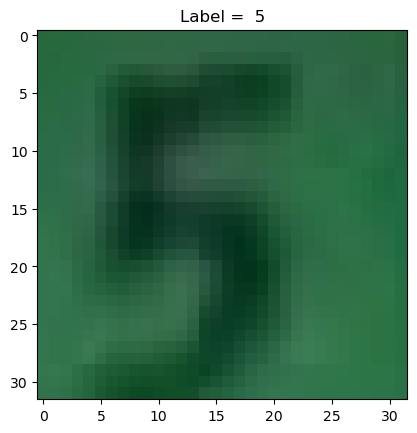

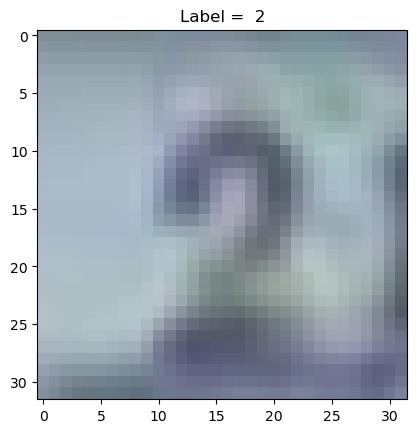

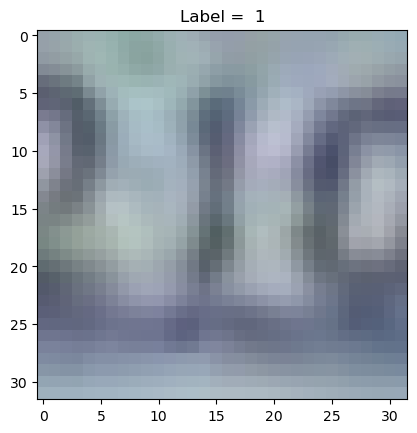

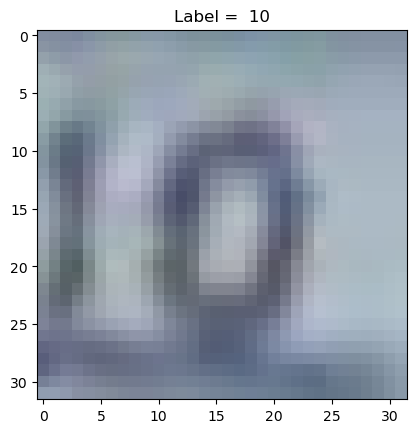

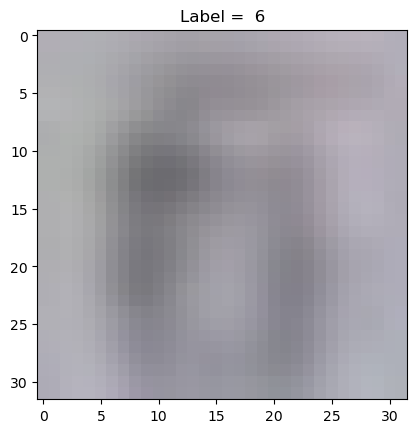

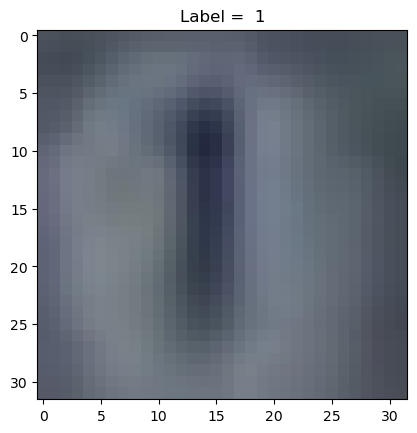

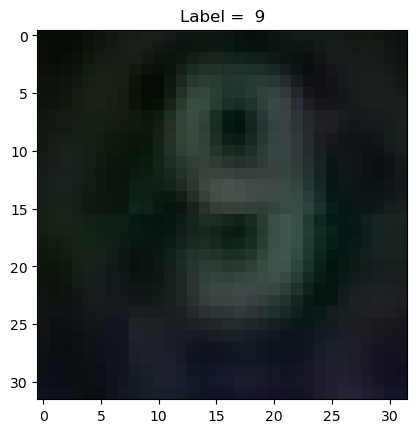

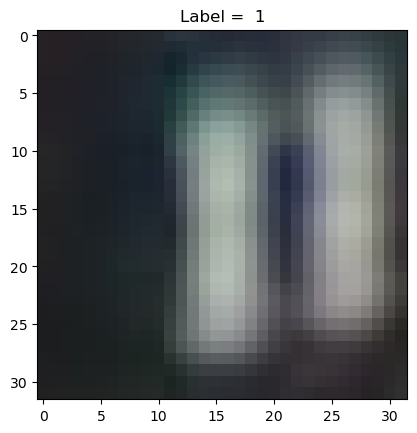

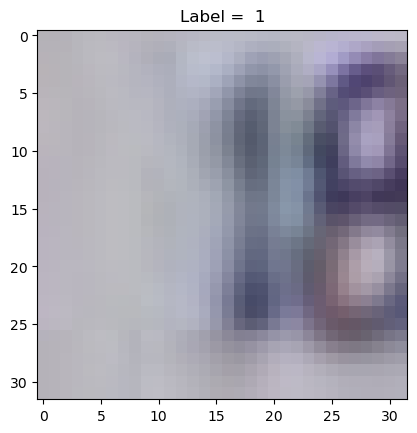

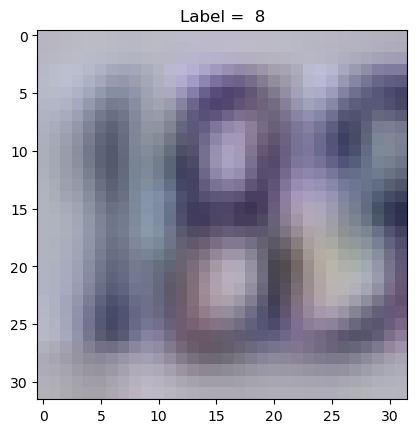

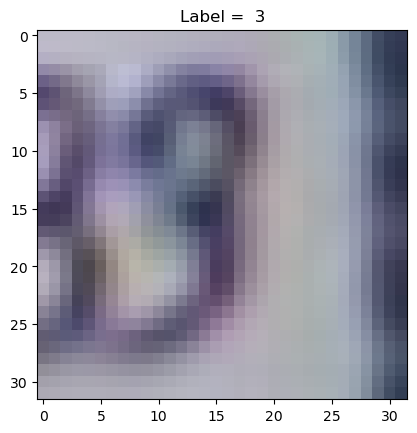

In [6]:
for i in range(0,11):
    fig = plt.figure()
    plt.title('Label =  %i' %(int(y_test[i])))
    plt.imshow(x_test[i])
    plt.show()

In [7]:
x_test = np.sum(x_test, axis=3) / 3 
x_train = np.sum(x_train, axis=3) / 3

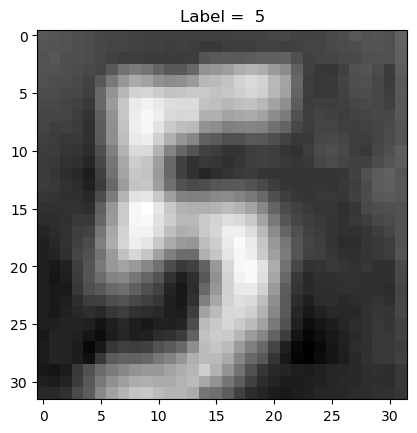

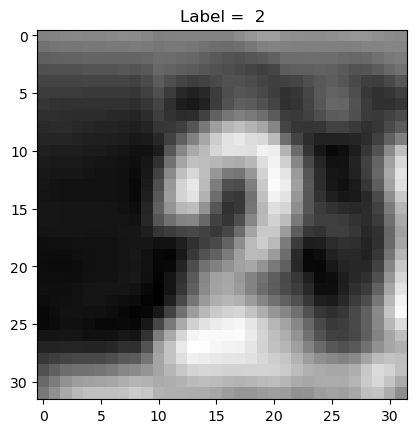

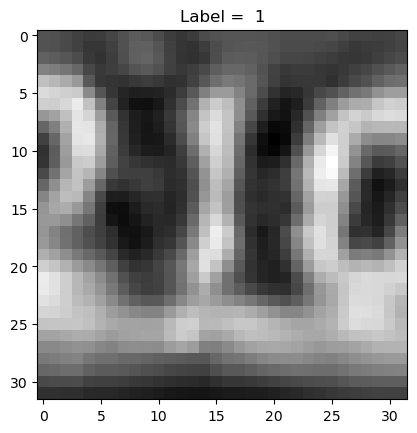

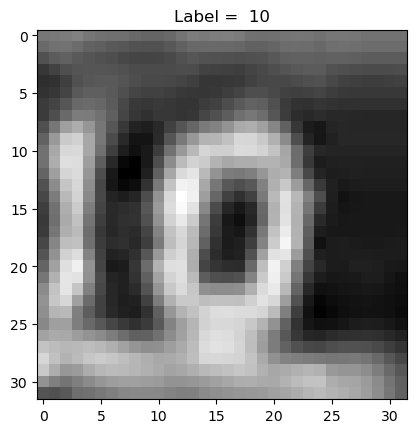

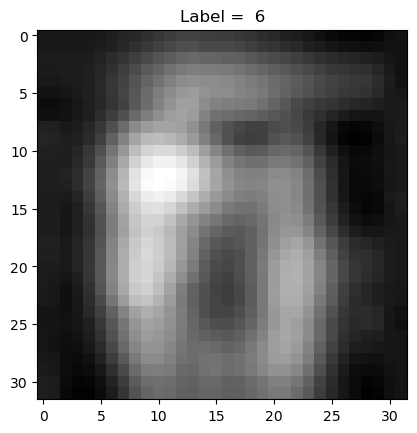

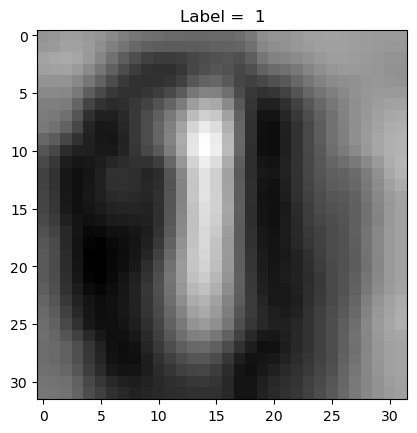

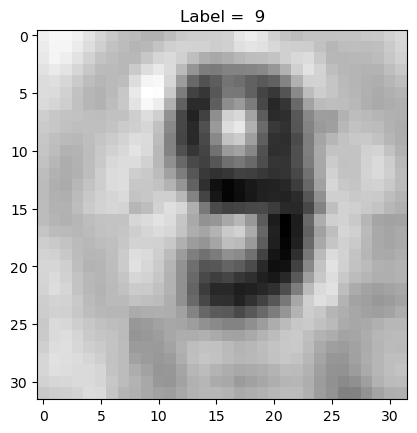

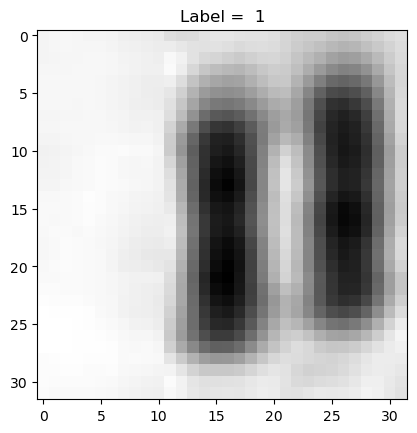

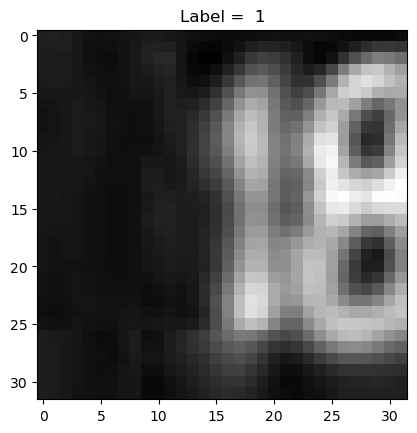

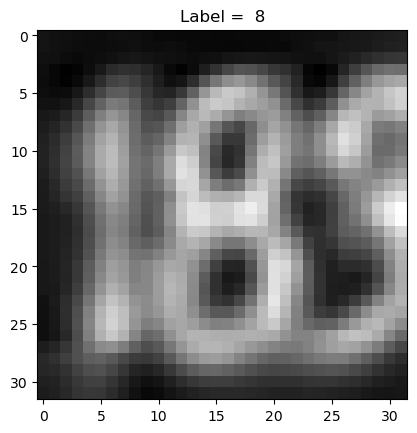

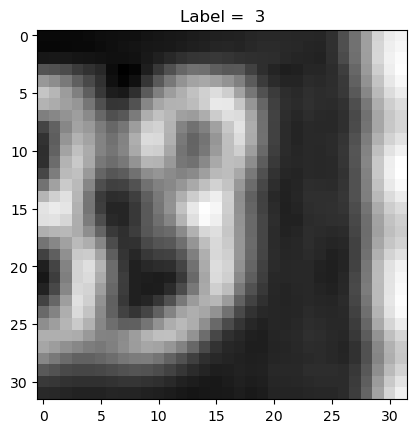

In [8]:
for i in range(0,11):
    fig = plt.figure()
    plt.title('Label =  %i' %(int(y_test[i])))
    plt.imshow(x_test[i], cmap='gray_r')
    plt.show()

## 2. MLP neural network classifier
* Build an MLP classifier model using the Sequential API. Your model should use only Flatten and Dense layers, with the final layer having a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different MLP architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 4 or 5 layers._
* Print out the model summary (using the summary() method)
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run. 
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* As a guide, you should aim to achieve a final categorical cross entropy training loss of less than 1.0 (the validation loss might be higher).
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [9]:
# Developing the Sequential model for MLP classifier
model_mlp = Sequential([
    Flatten(input_shape=(32, 32, 1)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(11, activation='softmax')
])


In [10]:
model_mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 128)               131200    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 11)                363       
                                                                 
Total params: 146,059
Trainable params: 146,059
Non-trai

In [11]:
# Compiling the MLP model
model_mlp.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
# Defining the Callbacks
checkpoint_path_mlp = 'model_checkpoints/checkpoint'
checkpoint_mlp = ModelCheckpoint(checkpoint_path_mlp, frequency='epoch', save_weights_only=True, save_best_only=True,
                             verbose=1)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy',patience=2)

In [13]:
# Reshaping the datasets 

x_train = x_train[...,np.newaxis]
x_test = x_test[...,np.newaxis]

In [14]:
# Fitting the MLP model

history_mlp = model_mlp.fit(x_train, y_train, epochs=30, batch_size=260, validation_split=0.1, callbacks=[early_stopping, checkpoint_mlp])

Epoch 1/30
254/254 [==============================] - ETA: 0s - loss: 4.9138 - accuracy: 0.1297
Epoch 1: val_loss improved from inf to 2.36020, saving model to model_checkpoints\checkpoint
254/254 [==============================] - 5s 14ms/step - loss: 4.9138 - accuracy: 0.1297 - val_loss: 2.3602 - val_accuracy: 0.1863
Epoch 2/30
249/254 [============================>.] - ETA: 0s - loss: 2.3279 - accuracy: 0.1797
Epoch 2: val_loss improved from 2.36020 to 2.31391, saving model to model_checkpoints\checkpoint
254/254 [==============================] - 2s 10ms/step - loss: 2.3275 - accuracy: 0.1800 - val_loss: 2.3139 - val_accuracy: 0.1766
Epoch 3/30
254/254 [==============================] - ETA: 0s - loss: 2.2710 - accuracy: 0.1919
Epoch 3: val_loss improved from 2.31391 to 2.24837, saving model to model_checkpoints\checkpoint
254/254 [==============================] - 2s 9ms/step - loss: 2.2710 - accuracy: 0.1919 - val_loss: 2.2484 - val_accuracy: 0.1946
Epoch 4/30
251/254 [==========

In [15]:
# Converting the history to pandas dataframe 

df_mlp = pd.DataFrame(history_mlp.history)
df_mlp.head()

,loss,accuracy,val_loss,val_accuracy
0,4.913829,0.129666,2.360201,0.186323
1,2.327513,0.179976,2.313905,0.176631
2,2.270968,0.191898,2.248368,0.194649
3,2.204926,0.210857,2.190604,0.214032
4,2.148843,0.235595,2.181646,0.193284


[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

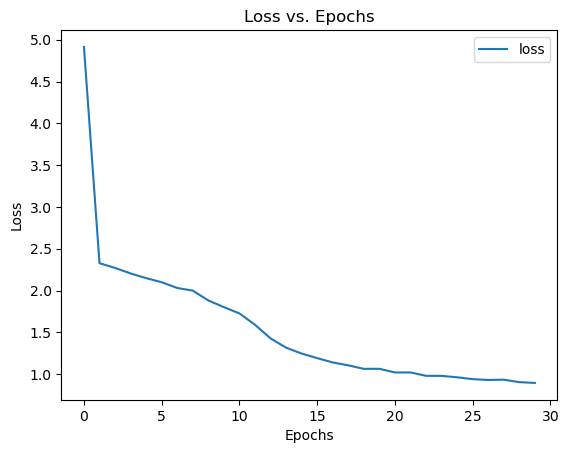

In [16]:
# Make a plot for the loss

loss_plot = df_mlp.plot(y='loss', title='Loss vs. Epochs', legend='False')
loss_plot.set(xlabel='Epochs', ylabel='Loss')


[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Val_Loss')]

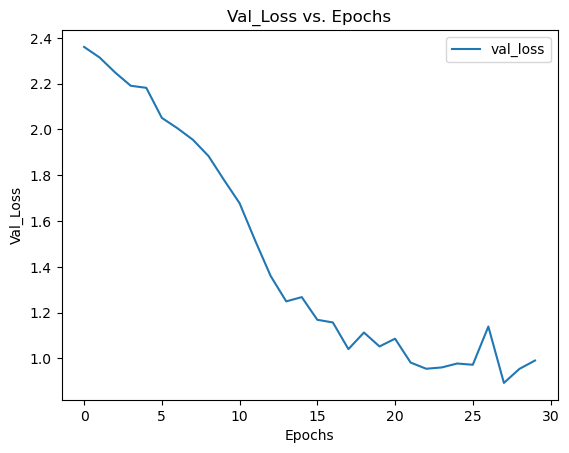

In [17]:
# Make a validation plot for the loss

loss_plot = df_mlp.plot(y='val_loss', title='Val_Loss vs. Epochs', legend='False')
loss_plot.set(xlabel='Epochs', ylabel='Val_Loss')


[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy')]

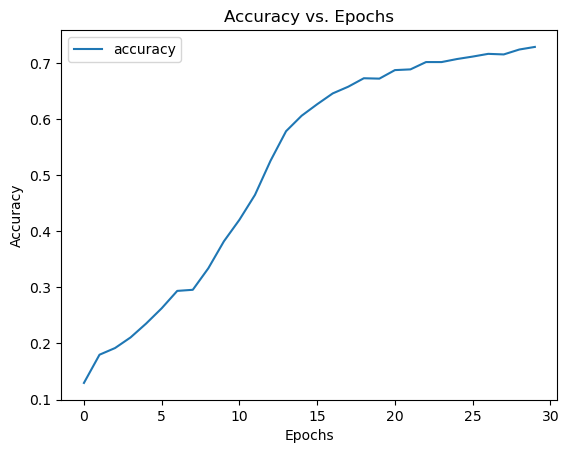

In [18]:
# Make a plot for the accuracy

acc_plot = df_mlp.plot(y='accuracy', title='Accuracy vs. Epochs', legend='False')
acc_plot.set(xlabel='Epochs', ylabel='Accuracy')


[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'val_Accuracy')]

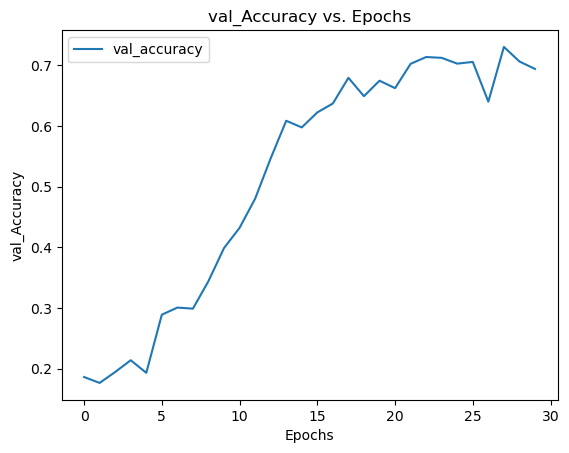

In [19]:
# Make a plot for the validation accuracy

acc_plot = df_mlp.plot(y='val_accuracy', title='val_Accuracy vs. Epochs', legend='False')
acc_plot.set(xlabel='Epochs', ylabel='val_Accuracy')


## 3. CNN neural network classifier
* Build a CNN classifier model using the Sequential API. Your model should use the Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense and Dropout layers. The final layer should again have a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different CNN architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 2 or 3 convolutional layers and 2 fully connected layers.)_
* The CNN model should use fewer trainable parameters than your MLP model.
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run.
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* You should aim to beat the MLP model performance with fewer parameters!
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [20]:
# Developing Sequential model for CNN classifier

model_cnn = Sequential([
    Conv2D(filters=16, input_shape=(32, 32, 1), kernel_size=(3, 3), 
           activation='relu', name='conv_1'),
    BatchNormalization(),
    Dropout(0.3),
    Conv2D(filters=8, kernel_size=(3, 3), activation='relu', name='conv_2'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), name='pool_1'),
    Dropout(0.3),
    Flatten(name='flatten'),
    Dense(units=32, activation='relu', name='dense_1'),
    Dense(units=11, activation='softmax', name='dense_2')
])

In [21]:
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 30, 30, 16)        160       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 16)       64        
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 30, 30, 16)        0         
                                                                 
 conv_2 (Conv2D)             (None, 28, 28, 8)         1160      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 8)        32        
 hNormalization)                                                 
                                                                 
 pool_1 (MaxPooling2D)       (None, 14, 14, 8)        

In [22]:
model_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [23]:
checkpoint_path_cnn = 'model_cnn_checkpoints/checkpoint'
checkpoint_cnn = ModelCheckpoint(checkpoint_path_cnn, frequency='epoch', save_weights_only=True,save_best_only=True, verbose=1)

In [24]:
history_cnn = model_cnn.fit(x_train, y_train, epochs=30,batch_size=264,validation_split=0.25, callbacks=[early_stopping,checkpoint_cnn])

Epoch 1/30
209/209 [==============================] - ETA: 0s - loss: 1.9576 - accuracy: 0.3279
Epoch 1: val_loss improved from inf to 1.30102, saving model to model_cnn_checkpoints\checkpoint
209/209 [==============================] - 67s 312ms/step - loss: 1.9576 - accuracy: 0.3279 - val_loss: 1.3010 - val_accuracy: 0.5752
Epoch 2/30
209/209 [==============================] - ETA: 0s - loss: 0.9056 - accuracy: 0.7168
Epoch 2: val_loss improved from 1.30102 to 0.73070, saving model to model_cnn_checkpoints\checkpoint
209/209 [==============================] - 55s 265ms/step - loss: 0.9056 - accuracy: 0.7168 - val_loss: 0.7307 - val_accuracy: 0.7779
Epoch 3/30
209/209 [==============================] - ETA: 0s - loss: 0.6848 - accuracy: 0.7926
Epoch 3: val_loss improved from 0.73070 to 0.64180, saving model to model_cnn_checkpoints\checkpoint
209/209 [==============================] - 55s 263ms/step - loss: 0.6848 - accuracy: 0.7926 - val_loss: 0.6418 - val_accuracy: 0.8075
Epoch 4/30


In [25]:

df_cnn = pd.DataFrame(history_cnn.history)
df_cnn.head()


,loss,accuracy,val_loss,val_accuracy
0,1.957572,0.327873,1.301021,0.575157
1,0.905590,0.716847,0.730696,0.777942
2,0.684754,0.792581,0.641799,0.807535
3,0.600095,0.818827,0.579692,0.826809
4,0.550703,0.833534,0.506482,0.850560


[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

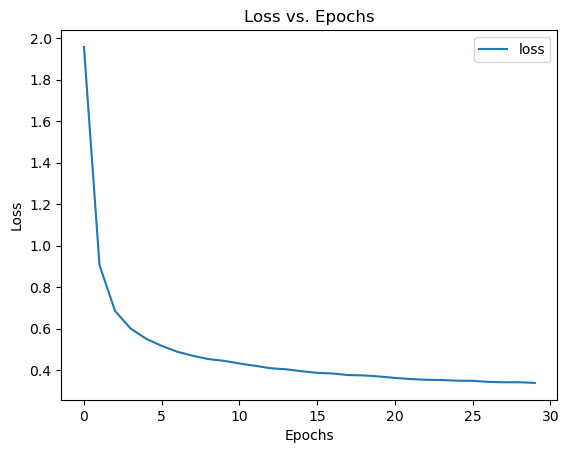

In [26]:
# Make a plot for the loss
loss_plot = df_cnn.plot(y='loss', title='Loss vs. Epochs', legend='False')
loss_plot.set(xlabel='Epochs', ylabel='Loss')


[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy')]

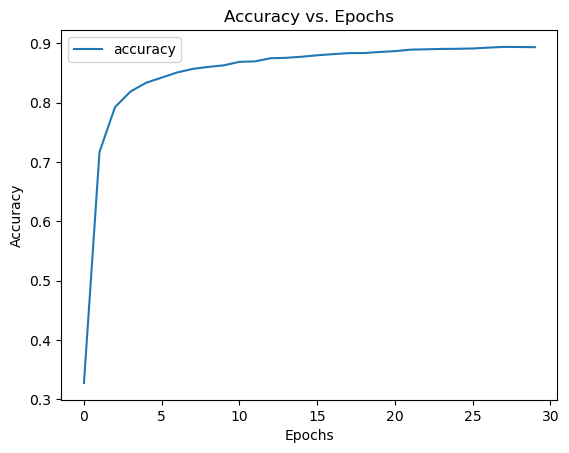

In [27]:
# Make a plot for the accuracy

acc_plot = df_cnn.plot(y='accuracy', title='Accuracy vs. Epochs', legend='False')
acc_plot.set(xlabel='Epochs', ylabel='Accuracy')


## 4. Get model predictions
* Load the best weights for the MLP and CNN models that you saved during the training run.
* Randomly select 5 images and corresponding labels from the test set and display the images with their labels.
* Alongside the image and label, show each model’s predictive distribution as a bar chart, and the final model prediction given by the label with maximum probability.

In [28]:
# Loading saved best weights

model_mlp.load_weights(checkpoint_path_mlp)

model_cnn.load_weights(checkpoint_path_cnn)


In [29]:
# Evaluating MLP model with saved best weights on test data
model_mlp.evaluate(x_test,y_test)

814/814 [==============================] - 3s 4ms/step - loss: 1.0442 - accuracy: 0.6942


[1.0441722869873047, 0.6942225098609924]

In [30]:
# Evaluating CNN model with saved best weights on test data
model_cnn.evaluate(x_test,y_test)

814/814 [==============================] - 8s 10ms/step - loss: 0.4688 - accuracy: 0.8635


[0.4688352644443512, 0.8634757399559021]

1/1 [==============================] - 0s 15ms/step


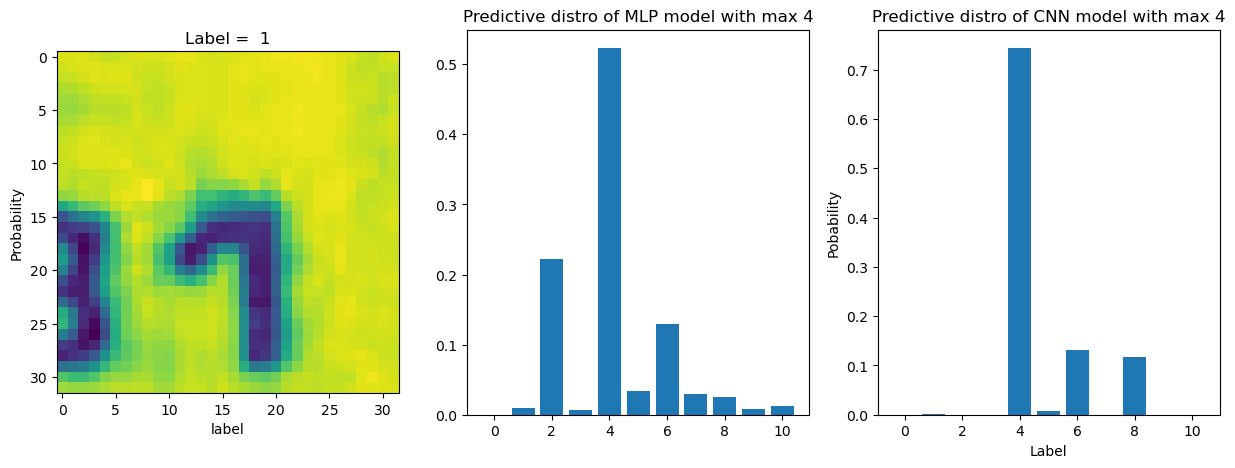

1/1 [==============================] - 0s 13ms/step


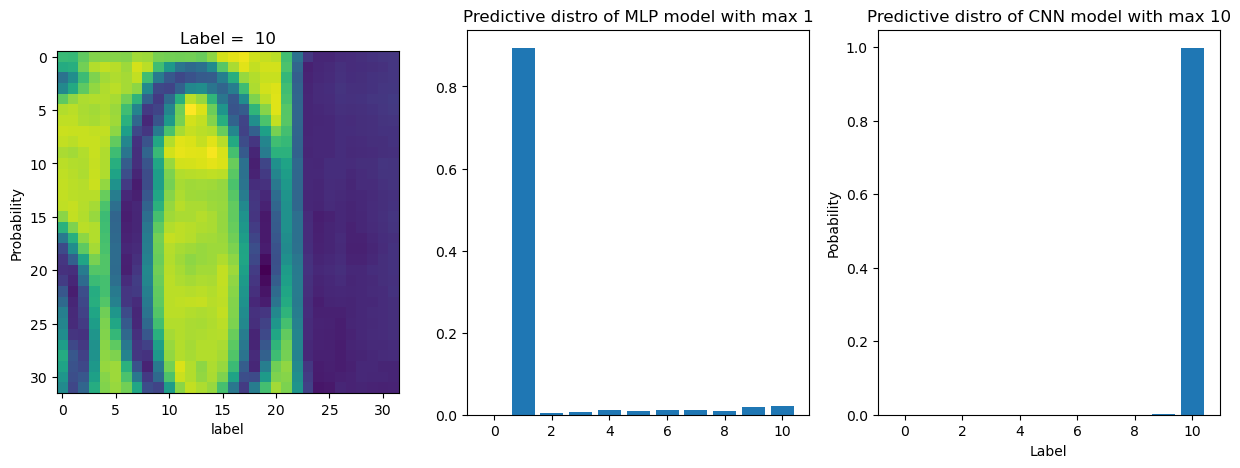

1/1 [==============================] - 0s 14ms/step


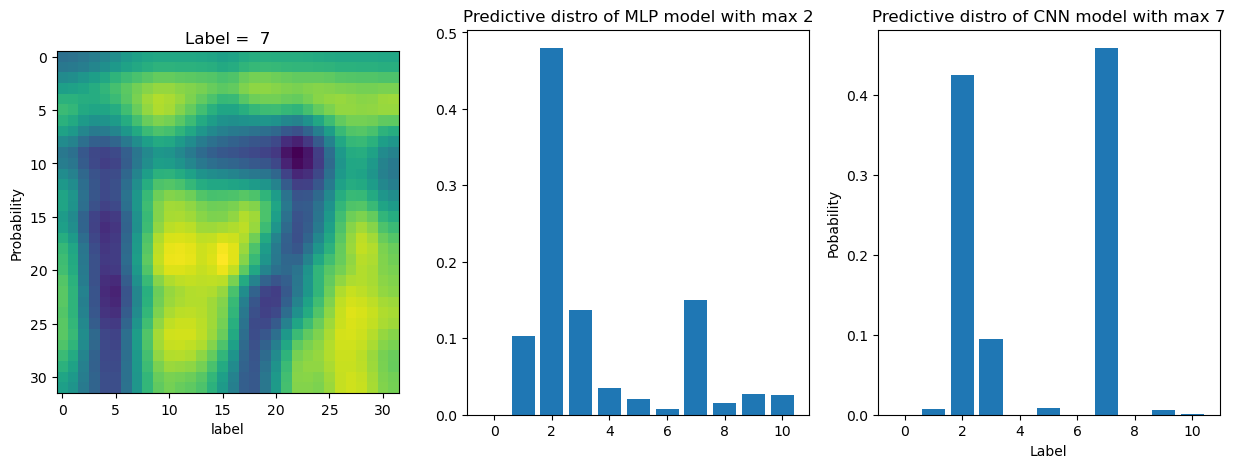

1/1 [==============================] - 0s 14ms/step


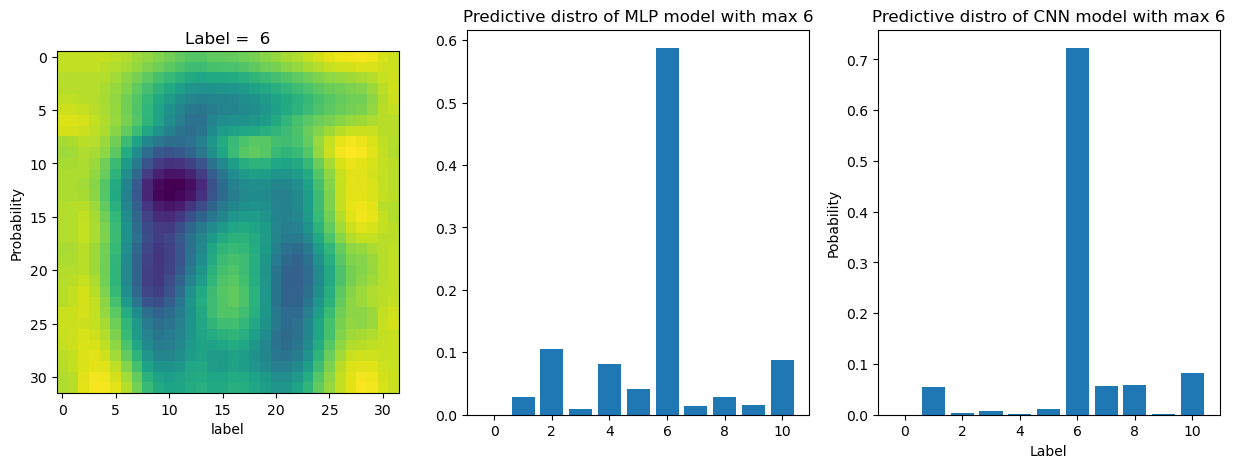

1/1 [==============================] - 0s 14ms/step


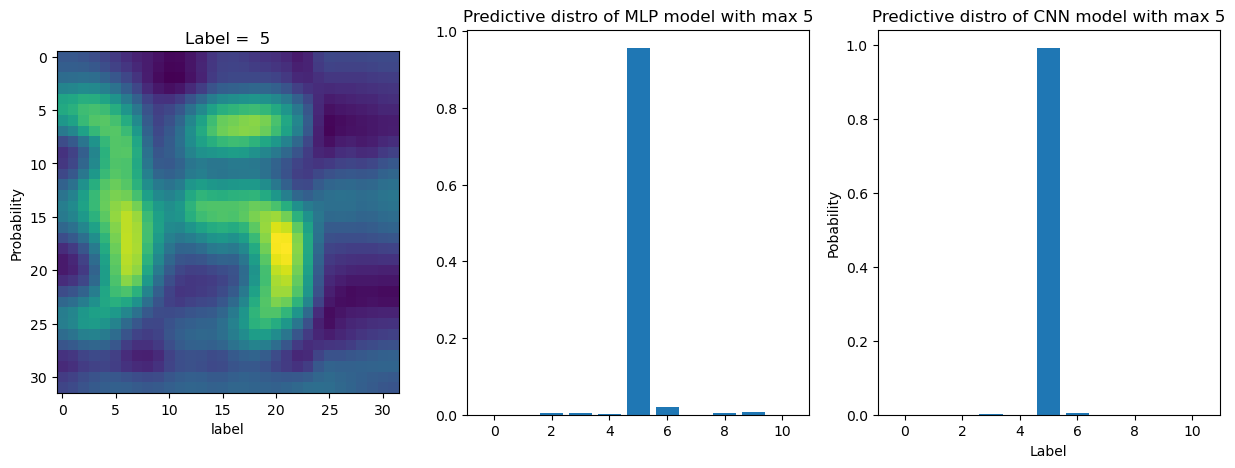

In [34]:
# Pltotting the image and the predictive distribution bar charts for random images in test 
prediction_mlp = []
prediction_cnn = []
for i in range(0,5):
    j=int(np.random.random()*100)
    prediction_mlp = model_mlp.predict(x_test[j][np.newaxis,...])
    prediction_cnn = model_cnn.predict(x_test[j][np.newaxis,...])

    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    axs[0].set_title('Label =  %i' %((y_test[j])))
    axs[0].imshow(x_test[j])
    
    axs[1].set_title('Predictive distro of MLP model with max %i' %(np.argmax(prediction_mlp[0])))
    axs[1].bar(range(0,11), prediction_mlp[0])
    axs[0].set_xlabel('label')
    axs[0].set_ylabel('Probability')

    axs[2].set_title('Predictive distro of CNN model with max %i' %(np.argmax(prediction_cnn[0])))
    axs[2].bar(range(0,11), prediction_cnn[0])
    axs[2].set_xlabel('Label')
    axs[2].set_ylabel('Pobability')
    plt.show()